In [2]:
%load_ext autoreload
%autoreload 2

import sys
import pandas
sys.path.append("..")
#import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import random
warnings.filterwarnings('ignore')
import os

datadir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/RicardoInVivoTurnover/Fig_MonomerMeasurements/Data/'
plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/RicardoInVivoTurnover/Fig_MonomerMeasurements/Plots/'
#dataout  = '/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/RiccyProject/Plotting/Plots/'

import sys

# Check the current recursion limit
current_limit = sys.getrecursionlimit()
print("Current recursion limit:", current_limit)

# Increase the recursion limit
sys.setrecursionlimit(6000)

Current recursion limit: 3000


In [6]:
def phiform(phi0,phi_inf,tau,t):
    if tau==0:
        phi = phi_inf
    else:
        phi = (phi0)*np.exp(-t/tau)+phi_inf
    return phi

def intersection(y,y0):
    diff = []
    for i in range(len(y)):
        diff.append(float((y[i]-y0)*(y[i]-y0)))
    diff2 = sorted(diff)
    x = diff.index(diff2[0])
    return x,diff[x]

In [20]:
cmap0 = plt.cm.get_cmap('Spectral_r') #YlOrBr
clrs1= ['#edf8b1','#7fcdbb','#2c7fb8']
clrs2=['#f7fcb9','#addd8e','#31a354']
#clrs2= ['#ece2f0','#a6bddb','#1c9099']
clrs3 = ['#e7e1ef','#c994c7','#dd1c77']

clrs_5 = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84','dimgrey']
#clrs_5 = ['#c7e9b4','#7fcdbb','#41b6c4','#2c7fb8','#253494']
clrs1= ['grey','#7fcdbb','#2c7fb8']
clrs2=['grey','#addd8e','#31a354']
#clrs2= ['#ece2f0','#a6bddb','#1c9099']
clrs3 = ['grey','#c994c7','#dd1c77']
clrs_div = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
ClrsRici = ["#96a2c1ff","#999ebeff","#a697baff","#b795afff","#c996a8ff","#d398a5ff"]
ClrsRici = ["#7883acff","#3e387bff","#73457aff","#a66181ff","#b25268ff","#d49995ff"] #"#b7645fff"]
clrrrs=[clrs1,clrs3,clrs2]

In [ ]:
## Skip some 

## Master Plot equilibrium

monomerdata_BP0.04_S1.dat
monomerdata_BP0.04_S2.dat
monomerdata_BP0.04_S3.dat
monomerdata_BP0.03_S1.dat
monomerdata_BP0.03_S2.dat
monomerdata_BP0.03_S3.dat
monomerdata_BP0.02_S1.dat
monomerdata_BP0.02_S2.dat
monomerdata_BP0.02_S3.dat
monomerdata_BP0.01_S1.dat
monomerdata_BP0.01_S2.dat
monomerdata_BP0.01_S3.dat
monomerdata_BP0.007_S1.dat
monomerdata_BP0.007_S2.dat
monomerdata_BP0.007_S3.dat
monomerdata_BP0.003_S1.dat
monomerdata_BP0.003_S2.dat
monomerdata_BP0.003_S3.dat


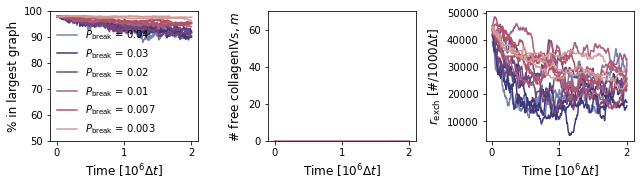

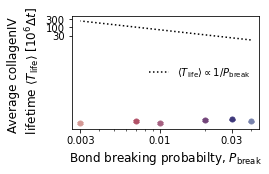

In [25]:
fig,ax = plt.subplots(1,3,figsize = (9,2.7))
fig2,ax2 = plt.subplots(1,figsize = (3.8,2.4))
timefactor = 10**6
f=3
MP = "0.12 0.1 0.06 0.03 0.02 0.01".split() # ORIGINAL RANGE  0.12 0.1 0.06 0.03 0.02 0.01
BP = "0.04 0.03 0.02 0.01 0.007 0.003".split() # ORIGINAL RANGE 0.04 0.03 0.02 0.01 0.007 0.003
seeds= "1 2 3".split()
BPsV = [0.04,0.03,0.02,0.01,0.007,0.003] #,0.03,0.02,0.01, 0.007,0.005,0.003
xstretches = "36 72 108".split()
j=0
#BPv = [0.04,0.03,0.02,0.01,0.007]
RateMonsAll = []
for f in range(len(MP)):
    IndividualT_MonRelase = []
    for s in range(len(seeds)):
        #Time NumMons RateMons LargestComp
        filename = 'monomerdata_BP'+BP[f]+'_S'+seeds[s]+'.dat'
        print(filename)
        MonData = pandas.read_csv(datadir+filename, header = 'infer',sep=' ')
        Time_ = MonData.Time
        NumMons_ = MonData.NumMons
        RateMons_ = MonData.RateMons
        LargestComp_ = MonData.LargestComp
        Time,NumMons,RateMons,LargestComp =Time_.values,NumMons_.values,RateMons_.values,LargestComp_.values
        #Time = Time_.astype('float')
        #print(Time[0])
        
        if len(Time)>0:
            if float(Time[-1]) >1.5e6:                    
                AvNumMons = np.mean(NumMons[int(len(RateMons)/2):])
                NumInNetwork = 6330-AvNumMons
                AverageT_MonRelease = np.divide(1,np.mean(np.abs(RateMons[int(len(RateMons)/2):])))
                IndividualT_MonRelase.append(np.divide(AverageT_MonRelease * NumInNetwork,10**6))
                #IndividualT_MonRelase.append(AverageT_MonRelease)

                N=7
                rollingRatAv = np.convolve(np.abs(np.ravel(RateMons)), np.ones(N)/N, mode='valid')
                timeRol = Time[int(N/2)+1:-int(N/2-1)]
                #ax[2].plot(Time[1:],np.abs(RateMons),alpha = 0.1,linestyle = '',marker = 'o',color = clrs_5[f])
                ax[2].plot(np.divide(timeRol,timefactor),np.multiply(rollingRatAv,1000),color = ClrsRici[f])

                concate = 1
                if s==0:
                    ax[0].plot(np.divide(Time,timefactor),100*LargestComp/6330,markersize = 2,color = ClrsRici[f],label = "$P_{\mathrm{break}}$ = "+BP[f])
                else:
                    ax[0].plot(np.divide(Time,timefactor),100*LargestComp/6330,markersize = 2,color = ClrsRici[f])
                ax[1].plot(np.divide(Time[concate:-concate],timefactor),NumMons[concate:-concate],color = ClrsRici[f])
            #print(NumMons[-1],seeds[s],MP[f])
    ax2.errorbar(BPsV[f],np.mean(IndividualT_MonRelase),yerr = np.std(IndividualT_MonRelase),capsize = 3,color = ClrsRici[f],marker = 'o',markersize = 5) ##Would this by x2??
    #ax2.plot(BPsV[f],np.divide(np.mean(IndividualT_MonRelase),10**6),color = clrs_5[f],marker = 'o',markersize = 10) ##Would this by x2??
    #print(MP[f],np.mean(IndividualT_MonRelase),np.std(IndividualT_MonRelase))
ax[0].legend(frameon=False,fontsize = 10,loc = [0.02,0.01])
ax[0].set_ylabel("% in largest graph",fontsize = 12)
ax[1].set_ylabel("# free collagenIVs, $m$",fontsize = 12)

ax[0].set_xlabel(r"Time [$10^6\Delta t$]",fontsize = 12)
ax[1].set_xlabel(r"Time [$10^6\Delta t$]",fontsize = 12)
ax[2].set_xlabel(r"Time [$10^6\Delta t$]",fontsize = 12)
ax[2].set_ylabel(r"$r_{\mathrm{exch}}$ [#$/1000\Delta t$]",fontsize = 12)
ax2.plot(BPsV,np.divide(0.7,BPsV),color = 'black',linestyle = ':',label = r"$\langle T_{\mathrm{life}}\rangle \propto 1/P_{\mathrm{break}}$")
ax[1].set_ylim([0,70])
ax[0].set_ylim([50,100])
#ax[2].set_ylabel("Free monomer lifetime",fontsize = 12)
ax2.set_ylabel("Average collagenIV \n lifetime"+r" $ \langle T_{\mathrm{life}}\rangle$ [$10^6\Delta t$]",fontsize = 12)
ax2.set_xlabel("Bond breaking probabilty, $P_{\mathrm{break}}$",fontsize = 12)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks([0.003,0.01,0.03],['0.003','0.01','0.03'])
ax2.set_yticks([30,100,300],['30','100','300'])
#ax2.set_yticks([0,100,200,300],['0','100','200','300'])
#ax2.set_ylim([50,350])
ax2.legend(frameon=False)
fig.tight_layout()
fig2.tight_layout()


#ax.set_ylim([70,100])
plotname = "EquilibriumMaster.pdf"
#fig.savefig(plotsdir+plotname)

plotname2 = "MonomerExchangeMaster.pdf"
#fig2.savefig(plotsdir+plotname2)
##plotname = "Equilibration_quants.pdf"


In [5]:
## properties during relax

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


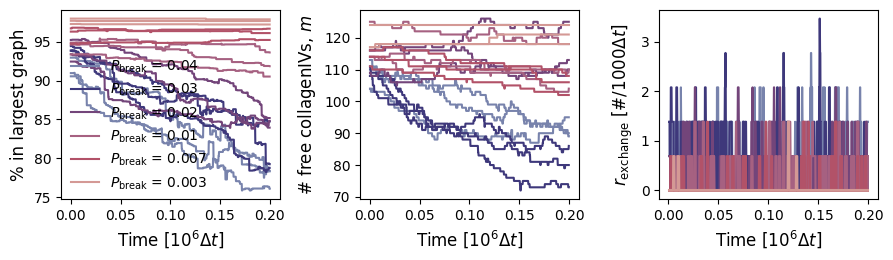

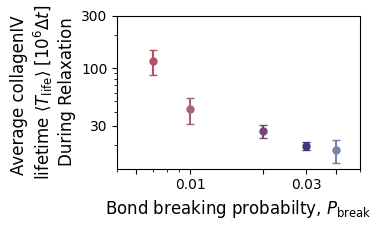

In [27]:
fig,ax = plt.subplots(1,3,figsize = (9,2.7))
fig2,ax2 = plt.subplots(1,figsize = (3.8,2.4))
timefactor = 10**6
f=3
MP = "0.12 0.1 0.06 0.03 0.02 0.01".split() # ORIGINAL RANGE  0.12 0.1 0.06 0.03 0.02 0.01
BP = "0.04 0.03 0.02 0.01 0.007 0.003".split() # ORIGINAL RANGE 0.04 0.03 0.02 0.01 0.007 0.003
seeds= "1 2 3".split()
BPsV = [0.04,0.03,0.02,0.01,0.007,0.003] #,0.03,0.02,0.01, 0.007,0.005,0.003
xstretches = "51".split()
j=0
#BPv = [0.04,0.03,0.02,0.01,0.007]
RateMonsAll = []
for f in range(len(MP)):
    IndividualT_MonRelase = []
    for s in range(len(seeds)):
        #print(MP[f])
        #for l in range(3): #EQUIB_STRETCH_RELAX --- STRETCH FROM 1.5e6 of equib
        RateMons = []
        RateMonsRel = []
        RateMonsInc = []
        datadir  = '/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/RiccyProject2/MP'+str(MP[f])+'_BP'+str(BP[f])+'/' 
        fnameEquib = datadir+'/Equilibrate/runMMons_tbonds1e6_tsample1e3_N_evSamp20_N_totSamp100_MP'+str(MP[f])+'_BP'+str(BP[f])+'_MD1.3_BD2.4_seed'+seeds[s]+'/'
        #fnameEquib = datadir+'/Equilibrate/run_tbonds1e6_tsample1e3_N_evSamp20_N_totSamp100_MP'+str(MP[f])+'_BP'+str(BP[f])+'_MD1.3_BD2.4_seed1/'
        #fnameStretch = datadir+'Stretch/run_tstretch1e4_TimeFrom1509600_xystretch'+xstretches[j]+'_seed1/'
        fnameRelax = datadir+'Relax/run_Simu_Dense_TimeFrom1509600_tbonds1e5_tsample1e3_Xstretch_'+xstretches[j]+'_N_evSamp20_N_totSamp100_MP'+MP[f]+'_BP'+BP[f]+'_MD1.5_BD2.4_seed'+seeds[s]+'/'
        #filename = 'run_tbonds1e6_tsample1e3_N_evSamp20_N_totSamp100_XStretch108_MP'+str(MP[f])+'_BP'+str(BP[f])+'_MD1.5_BD2.4_seed1/'
        filename = fnameRelax #fnameEquib
        file_path = filename+'/LargestComp_MP'+str(MP[f])+'_BP'+str(BP[f])+'.txt'
        file_path2 = filename+'/NumMons_MP'+str(MP[f])+'_BP'+str(BP[f])+'.txt'
        
        LargestComps_ = pandas.read_csv(file_path, header = None, usecols = [1], sep=' ')
        LargestComps = LargestComps_.values
        
        NumMons_ = pandas.read_csv(file_path2, header = None, usecols = [1], sep=' ')
        NumMons = NumMons_.values
        
        Time_ = pandas.read_csv(file_path, header = None, usecols = [0], sep=' ')
        Time = Time_.values
        #if Time[-1] >1.5e6:
        for tt in range(len(Time)-1):
            RateMons.append((NumMons[tt+1]-NumMons[tt])/(Time[tt+1]-Time[tt]))
        AvNumMons = np.mean(NumMons[int(len(RateMons)/2):])
        NumInNetwork = 6330-AvNumMons
        AverageT_MonRelease = np.divide(1,np.mean(np.abs(RateMons[int(len(RateMons)/2):])))
        IndividualT_MonRelase.append(np.divide(AverageT_MonRelease * NumInNetwork,10**6))
        #IndividualT_MonRelase.append(AverageT_MonRelease)
        
        N=6
        rollingRatAv = np.convolve(np.abs(np.ravel(RateMons)), np.ones(N)/N, mode='valid')
        timeRol = Time[int(N/2)+1:-int(N/2-1)]
        #ax[2].plot(Time[1:],np.abs(RateMons),alpha = 0.1,linestyle = '',marker = 'o',color = clrs_5[f])
        ax[2].plot(np.divide(timeRol,timefactor),np.multiply(rollingRatAv,1000),color = ClrsRici[f])
        
        concate = 1
        if s==0:
            ax[0].plot(np.divide(Time,timefactor),100*LargestComps/6330,markersize = 2,color = ClrsRici[f],label = "$P_{\mathrm{break}}$ = "+BP[f])
        else:
            ax[0].plot(np.divide(Time,timefactor),100*LargestComps/6330,markersize = 2,color = ClrsRici[f])
        ax[1].plot(np.divide(Time[concate:-concate],timefactor),NumMons[concate:-concate],color = ClrsRici[f])
            #print(NumMons[-1],seeds[s],MP[f])
    ax2.errorbar(BPsV[f],np.mean(IndividualT_MonRelase),yerr = np.std(IndividualT_MonRelase),capsize = 3,color = ClrsRici[f],marker = 'o',markersize = 5) ##Would this by x2??
    #print(np.multiply(rollingRatAv,1000))
    #ax2.plot(BPsV[f],np.divide(np.mean(IndividualT_MonRelase),10**6),color = clrs_5[f],marker = 'o',markersize = 10) ##Would this by x2??
    #print(MP[f],np.mean(IndividualT_MonRelase),np.std(IndividualT_MonRelase))
ax[0].legend(frameon=False,fontsize = 10,loc = [0.02,0.01])
ax[0].set_ylabel("% in largest graph",fontsize = 12)
ax[1].set_ylabel("# free collagenIVs, $m$",fontsize = 12)

ax[0].set_xlabel(r"Time [$10^6\Delta t$]",fontsize = 12)
ax[1].set_xlabel(r"Time [$10^6\Delta t$]",fontsize = 12)
ax[2].set_xlabel(r"Time [$10^6\Delta t$]",fontsize = 12)
ax[2].set_ylabel(r"$r_{\mathrm{exchange}}$ [#$/1000\Delta t$]",fontsize = 12)
#ax2.plot(BPsV[:-1],np.divide(0.7,BPsV[:-1]),color = 'black',linestyle = ':',label = r"$\langle T_{\mathrm{life}}\rangle \propto 1/P_{\mathrm{break}}$")
#ax[1].set_ylim([0,70])
#ax[0].set_ylim([50,100])
#ax[2].set_ylabel("Free monomer lifetime",fontsize = 12)
ax2.set_ylabel("Average collagenIV \nlifetime"+r" $ \langle T_{\mathrm{life}}\rangle$ [$10^6\Delta t$]"+"\nDuring Relaxation",fontsize = 12)
ax2.set_xlabel("Bond breaking probabilty, $P_{\mathrm{break}}$",fontsize = 12)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks([0.003,0.006,0.01,0.02,0.03,0.04],['0.003','','0.01','','0.03',''])
ax2.set_yticks([30,100,300],['30','100','300'])
ax2.set_xlim([0.005,0.05])
#ax2.set_yticks([0,100,200,300],['0','100','200','300'])
#ax2.set_ylim([50,350])
ax2.legend(frameon=False)
fig.tight_layout()
fig2.tight_layout()


#ax.set_ylim([70,100])
plotname = "EquilibriumMaster.pdf"
#fig.savefig(plotsdir+plotname)

plotname2 = "MonomerExchangeDuringRelax.pdf"
fig2.savefig(plotsdir+plotname2)
##plotname = "Equilibration_quants.pdf"


## Plotting master stretch plot

/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/RiccyProject2/MP0.1_BP0.03/Equilibrate/run_tbonds1e6_tsample1e3_N_evSamp20_N_totSamp100_XStretch108_MP0.1_BP0.03_MD1.5_BD2.4_seed1/
/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/RiccyProject2/MP0.1_BP0.03/Stretch/run_tstretch1e4_TimeFrom1509600_xystretch72_seed1/
/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/RiccyProject2/MP0.1_BP0.03/Relax/runAddMons_TimeFrom1509600_tbonds1e6_tsample1e3_Xstretch_72_N_evSamp20_N_totSamp100_MP0.1_BP0.03_MD1.5_BD2.4_seed1/


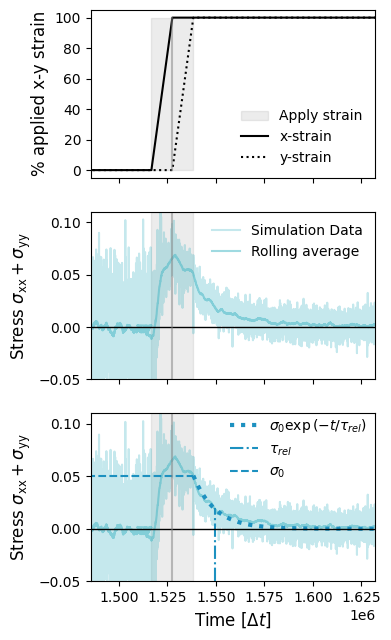

In [96]:
xstretches = "72".split()
MPs = "0.1".split()
BPs = "0.03".split()
j,f=0,0
fig,ax = plt.subplots(3,1,figsize = (4.,6.5))

#------------------ STRAIN ----------------------#
UP = [100,0.11,0.11]
LW = [0,-.05,-0.05]
t_equib = 1509600 +28800/4 
t_stretch = 28800*3/4 
t_relax = 125000
strain  = [0,0,100,100]
strain  = [0,0,100,100]
times1 = [0,t_equib+t_stretch/2,t_equib+t_stretch,t_equib+t_stretch+t_relax]
times2 = [0,t_equib,t_equib+t_stretch/2,t_equib+t_stretch+t_relax]

ax[0].set_ylabel("% applied x-y strain",fontsize =12)
#ax[0].set_xlabel(r"Time [$\Delta t$]",fontsize =12)
ax[0].fill_between([t_equib,t_equib+t_stretch],[LW[0],LW[0]],[UP[0],UP[0]],color = 'grey',alpha = 0.15,label = 'Apply strain')
ax[0].plot(times2,strain,color = "black",label = 'x-strain')
ax[0].plot(times1,strain,color = "black",linestyle = ':',label = 'y-strain')


#------------------ STRESS DATA ----------------------#

Vol1,Vol2 = 72*72*12,(72+int(xstretches[j]))*(72+int(xstretches[j]))*12-Vol1
timeadd = 0
datadir  = '/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/RiccyProject2/MP'+str(MPs[f])+'_BP'+str(BPs[f])+'/' 
fnameEquib = datadir+'Equilibrate/run_tbonds1e6_tsample1e3_N_evSamp20_N_totSamp100_XStretch108_MP'+MPs[f]+'_BP'+BPs[f]+'_MD1.5_BD2.4_seed1/'
fnameStretch = datadir+'Stretch/run_tstretch1e4_TimeFrom1509600_xystretch'+xstretches[j]+'_seed1/'
fnameRelax = datadir+'Relax/runAddMons_TimeFrom1509600_tbonds1e6_tsample1e3_Xstretch_'+xstretches[j]+'_N_evSamp20_N_totSamp100_MP'+MPs[f]+'_BP'+BPs[f]+'_MD1.5_BD2.4_seed1/'

foldernames = [fnameEquib,fnameStretch,fnameRelax]
timeTot,stressTot,VolTime = [],[],[]
#stressPostStretch,timePostStretch = [],[]

for i in range(3):

    foldername = foldernames[i]
    
    filename = '/thermo.dat'
    
    thermo = pandas.read_csv(foldername+filename, sep = ' ', header = 'infer')
    #step etot ke pe temp press CreateNC1 CumuCreateNC1 Create7s CumuCreate7s BreakNC1 CumuBreakNC1 Break7s CumuBreak7s
    etot_, ke_, peBond_,peAngle_, temp_, press_,stressX_,stressY_,stressZ_,AvBondForce_   = thermo.etot,thermo.ke,thermo.peBond,thermo.peAngle,thermo.temp,thermo.press,thermo.stressX,thermo.stressY,thermo.stressZ,thermo.AvBondForce     
    etot, ke, peBond,peAngle, temp, press,stressX,stressY,stressZ,AvBondForce =etot_.values, ke_.values, peBond_.values,peAngle_.values, temp_.values, press_.values,stressX_.values,stressY_.values,stressZ_.values,AvBondForce_.values
    Time_ = thermo.step
    Time = Time_.values
    end=0
    print(foldername)
    if i==0:
        stressX = np.divide(stressX,Vol1)
        stressY = np.divide(stressY,Vol1)
    if i==1:
        TimeSection = (Time[-1]-Time[0])/4
        for tt in range(len(Time)):
            if Time[tt] < Time[0]+TimeSection:
                VolTime.append(Vol1)
                stressX[tt],stressY[tt],tend = stressX[tt]/Vol1,stressY[tt]/Vol1,tt
            elif Time[tt] < Time[0]+TimeSection*3:
                VolAlt = (Vol1)+Vol2*(tt-tend)*2./len(Time) 
                VolTime.append(VolAlt)
                stressX[tt],stressY[tt] = stressX[tt]/VolAlt,stressY[tt]/VolAlt
            else:
                stressX[tt],stressY[tt] = stressX[tt]/(Vol2+Vol1),stressY[tt]/(Vol2+Vol1)
                VolTime.append(Vol2+Vol1)
    if i==2:
        stressX = np.divide(stressX,Vol2+Vol1)
        stressY = np.divide(stressY,Vol2+Vol1)

    for t in range(len(Time)):
        if i==0:
            if Time[t]<t_equib:
                timeTot.append(Time[t])
                stressTot.append(np.add(stressX[t],stressY[t]))
        elif i==1:
            if Time[t]<t_equib+t_stretch:
                #print('got here')
                timeTot.append(Time[t])
                stressTot.append(np.add(stressX[t],stressY[t]))
        else:
            if Time[t] >1:
                timeTot.append(Time[t]+t_equib+t_stretch)
                stressTot.append(np.add(stressX[t],stressY[t]))
                #stressPostStretch.append(stressTot[t])
                #timePostStretch.append(Time[t])

N=100
rollingAv = np.convolve(stressTot, np.ones(N)/N, mode='valid')
timeAv = timeTot[int(N/2):-int(N/2-1)]

ax[1].plot(timeTot,stressTot,alpha = .3,color= clrs_5[2],label = "Simulation Data")
ax[1].plot(timeAv,rollingAv,alpha = 0.5,linestyle = '-',color =  clrs_5[2],label = "Rolling average")
ax[1].plot([0,tau+t_equib+t_stretch+t_relax],[0,0],linestyle = '-',linewidth = 1,alpha = 1,color= 'black')
ax[1].set_ylabel(r'Stress $\sigma_{\mathrm{xx}}+\sigma_{\mathrm{yy}}$',fontsize = 12)
#ax[1].set_xlabel('Time [$\Delta t$]',fontsize = 12)

#------------------ STRESS FITTING ----------------------#

ax[2].plot(timeTot,stressTot,alpha = .3,color= clrs_5[2])
ax[2].plot(timeAv,rollingAv,alpha = 0.5,linestyle = '-',color =  clrs_5[2])

timeIndex = (np.abs(np.add(timeAv, - (t_equib+t_stretch)))).argmin() 
stressPostStretch =  rollingAv[timeIndex:]
timePostStretch =  np.add(timeAv[timeIndex:], - (t_equib+t_stretch))

phi_inf = 0
phi0 = stressPostStretch[0]
phiTau = phi0/np.exp(1)

tau = timePostStretch[intersection(stressPostStretch,phiTau)[0]]
phiTheory = []
for tt in range(len(timePostStretch)):
    t = timePostStretch[tt]
    phiTheory.append(phiform(phi0,phi_inf,tau,t))

text1 = r"$\sigma_{0} \exp{(-t/\tau_{rel})}$"
text2 = r"$\tau_{rel}$"
text3 = r"$\sigma_{0}$"
ax[2].plot(np.add(timePostStretch,t_equib+t_stretch),phiTheory,linestyle = ':',linewidth = 3,alpha = 1,color= clrs_5[3],label=text1)
ax[2].plot([tau+t_equib+t_stretch,tau+t_equib+t_stretch],[-0.05,0.02],linestyle = 'dashdot',linewidth = 1.5,alpha = 1,color= clrs_5[3],label = text2)
ax[2].plot([0,t_equib+t_stretch],[phi0,phi0],linestyle = '--',linewidth = 1.5,alpha = 1,color= clrs_5[3],label = text3)
ax[2].plot([0,tau+t_equib+t_stretch+t_relax],[0,0],linestyle = '-',linewidth = 1,alpha = 1,color= 'black')
ax[2].set_ylabel(r'Stress $\sigma_{\mathrm{xx}}+\sigma_{\mathrm{yy}}$',fontsize = 12)
ax[2].set_xlabel('Time [$\Delta t$]',fontsize = 12)


for i in range(3):
    #ax[i].plot([t_equib,t_equib],[LW[i],UP[i]],linestyle = ':',color = 'grey')
    #ax[i].plot([t_equib+t_stretch,t_equib+t_stretch],[LW[i],UP[i]],linestyle = ':',color = 'grey')
    #else:
    if i!=0:
        ax[i].fill_between([t_equib,t_equib+t_stretch],[LW[i],LW[i]],[UP[i],UP[i]],color = 'grey',alpha = 0.15)
    ax[i].set_xlim([t_equib-t_relax/4,t_equib+t_stretch+(t_relax*3/4)])
    ax[i].plot([t_equib+t_stretch/2,t_equib+t_stretch/2],[LW[i],UP[i]],alpha = 0.5,color = 'grey')
    if i==2:
        ax[i].legend(frameon=False,loc = [0.47,0.57])
    else:
        ax[i].legend(frameon=False)
    if i!=2:
        ax[i].set_xticklabels([])
    if i>0:
        ax[i].set_ylim([LW[i],UP[i]])


fig.tight_layout()
plotname = "MasterStretch_1exampleNOTEXP.pdf"
#fig.savefig(plotsdir+plotname)

        #LargestCompTot.append(LargestComps[tt])
    #RateMonsAll.append(np.divide(1,np.mean(np.abs(RateMons))))

#ax2[0].plot(
#N=10
#RateMons =np.reshape(RateMons, RateMons.size)
#rollingRatAv = np.convolve(np.abs(np.ravel(RateMons)), np.ones(N)/N, mode='valid')
#timeRol = Time[int(N/2)+1:-int(N/2-1)]
#ax[2].plot(BPv[f],np.divide(np.mean(NumMons),np.mean(np.abs(RateMons))),color = clrs_5[f],marker = 'o',markersize = 5) ##Would this by x2??
#np.shape(RateMons)
#ax[2].plot(Time[1:],np.abs(RateMons),alpha = 0.1,linestyle = '',marker = 'o',color = clrs_5[f])
#ax[2].plot(timeRol,np.multiply(rollingRatAv,1000),color = clrs_5[f])
#ax2.plot(BPsV[f],np.divide(1,1000*np.mean(np.abs(RateMons))),color = clrs_5[f],marker = 'o',markersize = 10) ##Would this by x2??
#concate = 1
#print(LargestComps)
#print(np.mean(np.abs(RateMons)))
#ax[0].plot(Time,100*LargestComps/6250,markersize = 2,color = clrs_5[f],label = "$P_{\mathrm{break}}$ = "+BP[f])
#ax[1].plot(Time[concate:-concate],NumMons[concate:-concate],color = clrs_5[f],label = "$P_{\mathrm{break}}$ = "+BP[f])











No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


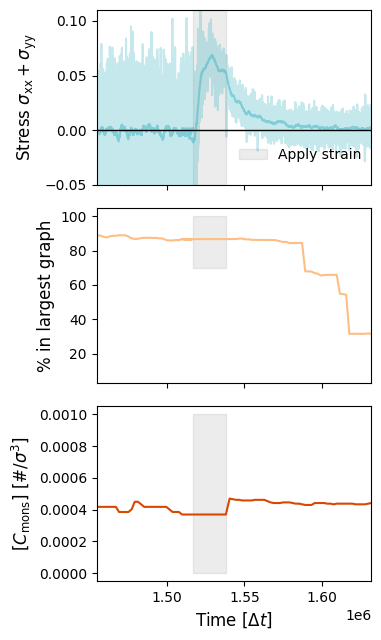

In [97]:


#################------------ FIGURE 2 -------------------###################

fig2,ax2 = plt.subplots(3,1,figsize = (4.,6.5))


ax2[0].plot(timeTot,stressTot,alpha = .3,color= clrs_5[2])
ax2[0].plot(timeAv,rollingAv,alpha = 0.5,linestyle = '-',color =  clrs_5[2])
ax2[0].plot([0,tau+t_equib+t_stretch+t_relax],[0,0],linestyle = '-',linewidth = 1,alpha = 1,color= 'black')
ax2[0].set_ylabel(r'Stress $\sigma_{\mathrm{xx}}+\sigma_{\mathrm{yy}}$',fontsize = 12)


#---------- Largest connected component ---------------#

LargestCompTot,NumMonstot,time2Tot,MonConc = [],[],[],[]

for i in range(3):

    foldername = foldernames[i]

    file_path = foldername+'/LargestComp_MP'+str(MPs[f])+'_BP'+str(BPs[f])+'.txt'
    file_path2 = foldername+'/NumMons_MP'+str(MPs[f])+'_BP'+str(BPs[f])+'.txt'

    LargestComps_ = pandas.read_csv(file_path, header = None, usecols = [1], sep=' ')
    LargestComps = LargestComps_.values
    
    NumMons_ = pandas.read_csv(file_path2, header = None, usecols = [1], sep=' ')
    NumMons = NumMons_.values
    
    Time_ = pandas.read_csv(file_path, header = None, usecols = [0], sep=' ')
    Time = Time_.values
    #for tt in range(len(Time)-1):
    #    RateMons.append((NumMons[tt+1]-NumMons[tt])/(Time[tt+1]-Time[tt]))
    for t in range(len(Time)):
        if i==0:
            if Time[t]<t_equib:
                time2Tot.append(Time[t])
                LargestCompTot.append(LargestComps[t])
                NumMonstot.append(NumMons[t])
                MonConc.append(NumMons[t]/Vol1)
        elif i==1:
            if Time[t]<t_equib+t_stretch:
                #print('got here')
                #elif Time[tt] < Time[0]+TimeSection*3:
                VolAlt = (Vol1) #+Vol2*(t-len(Time)*3/4)*2/len(Time) 
                #VolTime.append(VolAlt)
                
                time2Tot.append(Time[t])
                LargestCompTot.append(LargestComps[t])
                NumMonstot.append(NumMons[t])
                MonConc.append(NumMons[t]/VolAlt)
        else:
            if Time[t] >1:
                time2Tot.append(Time[t]+t_equib+t_stretch)
                LargestCompTot.append(LargestComps[t])
                NumMonstot.append(NumMons[t])
                MonConc.append(NumMons[t]/(Vol2+Vol1))


ax2[1].plot(time2Tot,np.divide(LargestCompTot,6250/100),color = '#fdbe85')
ax2[1].set_ylabel("% in largest graph",fontsize = 12)

#------------ Number of monomers -----------------–-#
ax2[2].plot(time2Tot,MonConc,color = '#d94701')


UP = [0.11,100,0.001]
LW = [-0.05,70,0]
for i in range(3):
    #ax[i].plot([t_equib,t_equib],[LW[i],UP[i]],linestyle = ':',color = 'grey')
    #ax[i].plot([t_equib+t_stretch,t_equib+t_stretch],[LW[i],UP[i]],linestyle = ':',color = 'grey')
    if i==0:
        ax2[i].fill_between([t_equib,t_equib+t_stretch],[LW[i],LW[i]],[UP[i],UP[i]],color = 'grey',alpha = 0.15,label = 'Apply strain')
    else:
        ax2[i].fill_between([t_equib,t_equib+t_stretch],[LW[i],LW[i]],[UP[i],UP[i]],color = 'grey',alpha = 0.15)
    ax2[i].set_xlim([t_equib-t_relax/2,t_equib+t_stretch+(t_relax*3/4)])
    if i==0:
        ax2[i].legend(frameon=False,loc = [0.5,0.1])
        ax2[i].set_ylim([LW[i],UP[i]])
    else:
        ax2[i].legend(frameon=False)
ax2[0].set_xticklabels([])
ax2[1].set_xticklabels([])
ax2[2].set_ylabel(r"$[C_{\mathrm{mons}}]$ [#$/\sigma^{3}]$",fontsize = 12)
ax2[2].set_xlabel('Time [$\Delta t$]',fontsize = 12)

fig2.tight_layout()

plotname = "LC_and_MonConc_1exampleBREAK.pdf"

fig2.savefig(plotsdir+plotname)

## Plotting all stress

36 MP0.12_BP0.04
40000
44440
72 MP0.12_BP0.04
40000
12040
36 MP0.1_BP0.03
40000
14960
72 MP0.1_BP0.03
40000
11220
36 MP0.06_BP0.02
40000
15480
72 MP0.06_BP0.02
40000
14060
36 MP0.03_BP0.01
40000
16340
72 MP0.03_BP0.01
40000
18500
36 MP0.02_BP0.007
40000
12520
72 MP0.02_BP0.007
40000
14920
36 MP0.015_BP0.005
40000
66280
72 MP0.015_BP0.005
40000
20980
36 MP0.01_BP0.003
40000
15540
72 MP0.01_BP0.003
40000
20620


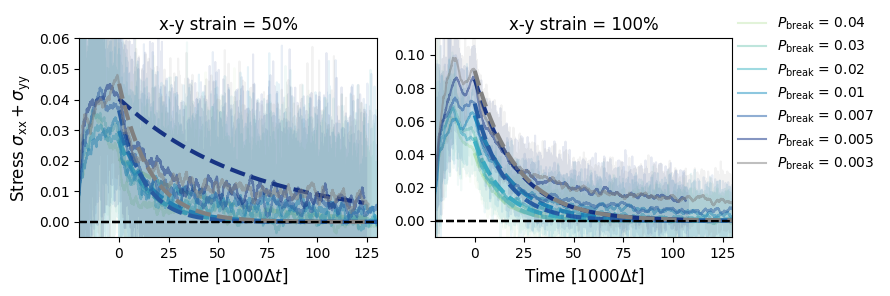

In [61]:

#MP = "0.06 0.03 0.02 0.015 0.01 0.003".split() # ORIGINAL RANGE 0.12 0.1 0.06 0.03 0.02
#BP = "0.02 0.01 0.007 0.005 0.003 0.001".split() # ORIGINAL RANGE 0.04 0.03 0.02 0.01 0.007
#BPsV = [0.02,0.01, 0.007,0.005,0.003,0.001] #0.04, 0.03, 0.02, 0.01, 0.007


xstretches = "36 72".split() #36 72 108

#BPs = "0.04 0.03 0.02 0.01 0.007".split() # 0.030.01 0.03 
#MPs = "0.12 0.1 0.06 0.03 0.02".split() # 0.10.03 0.1 
MPs = "0.12 0.1 0.06 0.03 0.02 0.015 0.01".split() # ORIGINAL RANGE 0.12 0.1 0.06 0.03 0.02
BPs = "0.04 0.03 0.02 0.01 0.007 0.005 0.003".split() # ORIGINAL RANGE 0.04 0.03 0.02 0.01 0.007
#BPsV = [0.04, 0.03, 0.02, 0.01, 0.007]
BPsV = [0.02,0.01, 0.007,0.005,0.003,0.001] #0.04, 0.03, 0.02, 0.01, 0.007
fig,ax=plt.subplots(1,len(xstretches),figsize = (4.5*len(xstretches),3))
j=1
strains = "50 100 150".split()
taus = np.zeros((len(xstretches),len(MPs)))
#fig2,ax2 = plt.subplots(figsize = (4,3))
#foldernameBONDS = datadir+'runBONDprinting_tmix1e4_tbonds5e5_tstretch1e4_trelax5e5_N_fix50_XStretch108_Nev200_ChemBond6.0_prob0.05_seed'+seeds[s]+'/dumplin_bonds/'
for k in range(len(BPs)):
    datadir = datadir0+ 'MP'+MPs[k]+'_BP'+BPs[k]+'/'
    for j in range(len(xstretches)):
        print(xstretches[j]+' '+'MP'+MPs[k]+'_BP'+BPs[k])
        Vol1 = 72*72*12
        Vol2 = (72+int(xstretches[j]))*(72+int(xstretches[j]))*12-Vol1
        VolTime = []
        timeadd = 0
        #fnameEquib = datadir+'Equilibrate/run_tbonds1e6_tsample1e3_N_evSamp20_N_totSamp100_XStretch108_MP'+MPs[k]+'_BP'+BPs[k]+'_MD1.5_BD2.4_seed1/'
        #fnameStretch = datadir+'Stretch/run_tstretch1e4_TimeFrom1509600_xystretch'+xstretches[j]+'_seed1/'
        #fnameRelax = datadir+'Relax/runAddMons_TimeFrom1509600_tbonds1e6_tsample1e3_Xstretch_'+xstretches[j]+'_N_evSamp20_N_totSamp100_MP'+MPs[k]+'_BP'+BPs[k]+'_MD1.5_BD2.4_seed1/'
        #else:
        fnameStretch = datadir+'Stretch/run_tstretch1e4_TimeFrom1509600_xystretch'+xstretches[j]+'_seed1/'
        fnameRelax = datadir+'Relax/runAddMons_TimeFrom1509600_tbonds1e6_tsample1e3_Xstretch_'+xstretches[j]+'_N_evSamp20_N_totSamp100_MP'+MPs[k]+'_BP'+BPs[k]+'_MD1.5_BD2.4_seed1/'
        
        foldernames = [fnameStretch,fnameRelax]
        timeTot = []
        stressTot=[]
        #clrs = clrrrs[i]
        #print(clrs)
        for i in range(2):
            foldername = foldernames[i]
            #print(i,j,k)
            #if i==1 and k==1 and j==
            filename = '/thermo.dat'
            thermo = pandas.read_csv(foldername+filename, sep = ' ', header = 'infer')
            #thermo2 = thermo = pandas.read_csv(foldername+'/thermo2.dat', sep = ' ', header = 'infer')
            #step etot ke pe temp press CreateNC1 CumuCreateNC1 Create7s CumuCreate7s BreakNC1 CumuBreakNC1 Break7s CumuBreak7s
            etot_, ke_, peBond_,peAngle_, temp_, press_,stressX_,stressY_,stressZ_,AvBondForce_   = thermo.etot,thermo.ke,thermo.peBond,thermo.peAngle,thermo.temp,thermo.press,thermo.stressX,thermo.stressY,thermo.stressZ,thermo.AvBondForce     
            etot, ke, peBond,peAngle, temp, press,stressX,stressY,stressZ,AvBondForce =etot_.values, ke_.values, peBond_.values,peAngle_.values, temp_.values, press_.values,stressX_.values,stressY_.values,stressZ_.values,AvBondForce_.values
            Time_ = thermo.step
            Time = Time_.values

            if i==0:
                print(Time[-1]-Time[0])
                TimeSection = (Time[-1]-Time[0])/4
                for tt in range(len(Time)):
                    if Time[tt] < Time[0]+TimeSection:
                        VolTime.append(Vol1)
                        stressX[tt] = stressX[tt]/Vol1
                        stressY[tt] = stressY[tt]/Vol1
                        tend = tt
                    elif Time[tt] < Time[0]+TimeSection*3:
                        VolAlt = (Vol1)+Vol2*(tt-tend)*2./len(Time)  #*(Time[tt]-TimeSection)/(TimeSection*2)
                        #print((tt-tend)/len(Time))
                        #print(Vol2*(Time[tt]-TimeSection)/(TimeSection*2))
                        VolTime.append(VolAlt)
                        stressX[tt] = stressX[tt]/VolAlt
                        stressY[tt] = stressY[tt]/VolAlt
                    else:
                        stressX[tt] = stressX[tt]/(Vol2+Vol1)
                        stressY[tt] = stressY[tt]/(Vol2+Vol1)
                        VolTime.append(Vol2+Vol1)
            if i==1:
                stressX = np.divide(stressX,Vol2+Vol1)
                stressY = np.divide(stressY,Vol2+Vol1)
            end=1
            timeadd = 0
            if i==0:
                end = int(len(Time)/4)
                timeadd = -Time[-end]
                AddedAtEnd = int(3*len(Time)/4)
            for t in range(len(Time[2:-end])):
                timeTot.append(Time[t+2]+timeadd)
                stressTot.append(np.add(stressX[t+2],stressY[t+2]))
            #timeTot1 = Time[2:-end]+timeadd
            #stressTot1 = np.add(stressX[2:-end],stressY[2:-end])
            N=100
        ax[j].plot(np.divide(timeTot,1000),stressTot,alpha = 0.1,color= clrs_5[k])
            #print(i,j,k,np.max(stressTot1))
            #rollingAv1 = np.convolve(stressTot1, np.ones(N)/N, mode='valid')
            #rollingTime1 = timeTot1[int(N/2):-int(N/2-1)]
        if j==0:
            ax[j].set_ylim([-0.005,0.06])
        if j==1:
            ax[j].set_ylim([-0.01,0.11])
        if j==2:
            ax[j].set_ylim([-0.015,0.12])
        #ax[j].set_xlabel('Time [$\Delta t$]',fontsize = 12)
        #ax[j].set_title('x-y strain = '+strains[j]+'%')
       # ax[j].plot([-20000,150000],[0,0],linestyle = '--',color = 'black')
       # ax[j].set_xlim([-20000,130000])
            #ax[j].set_yscale('log')
            #ax[j].set_ylim([0.00001,0.1])
        rollingAv = np.convolve(stressTot, np.ones(N)/N, mode='valid')
        timeAv = timeTot[int(N/2):-int(N/2-1)]
        ax[j].plot(np.divide(timeAv,1000),rollingAv,alpha = 0.5,linestyle = '-',color =  clrs_5[k],label = r'$P_{\mathrm{break}}$ = '+BPs[k])
        timePostStretch = timeAv[AddedAtEnd-50:]
        stressPostStretch = rollingAv[AddedAtEnd-50:]
        #ax[j].plot(timePostStretch,stressPostStretch,alpha = 1,linestyle = ':',color =  clrs_5[k],label = r'$P_{\mathrm{break}} = $'+BPs[k])
        phi_inf = 0
        phi0 = stressPostStretch[0]
        phiTau = phi0/np.exp(1)
        tau = timePostStretch[intersection(stressPostStretch,phiTau)[0]]
        print(tau)
        phiTheory = []
        for tt in range(len(timePostStretch)):
            t = timePostStretch[tt]
            phiTheory.append(phiform(phi0,phi_inf,tau,t))
            
        ax[j].plot(np.divide(timePostStretch,1000),phiTheory,alpha = 1,linestyle = '--',color = clrs_5[k],linewidth=3)
        taus[j][k] = tau
        
        ax[j].set_xlabel('Time [$1000\Delta t$]',fontsize = 12)
        ax[j].set_title('x-y strain = '+strains[j]+'%')
        ax[j].plot([-20000/1000,150000/1000],[0,0],linestyle = '--',color = 'black')
        ax[j].set_xlim([-20000/1000,130000/1000])


ax[0].set_ylabel(r'Stress $\sigma_{\mathrm{xx}}+\sigma_{\mathrm{yy}}$',fontsize = 12)
ax[1].legend(frameon=False,fontsize = 10,loc = [1.,0.3])
fig.tight_layout()


plotname = "StressRelaxation_MultiplePbreak.pdf"
#fig.savefig(plotsdir+plotname)

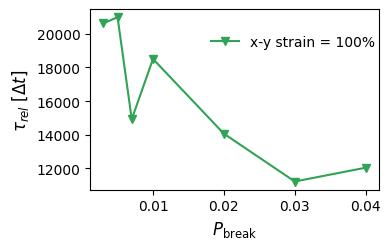

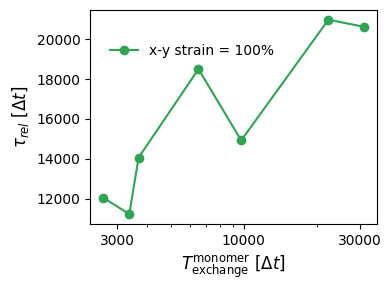

In [93]:
BPsV = [0.04,0.03,0.02,0.01, 0.007,0.005,0.003] #BPsV = [0.04, 0.03, 0.02, 0.01, 0.007]
fig,ax = plt.subplots(1,figsize = (4,2.6))
ax.set_ylabel(r"$\tau_{rel}$ [$\Delta t$]",fontsize = 12)
ax.set_xlabel(r'$P_{\mathrm{break}}$',fontsize = 12)

#ax.plot(BPsV,taus[0,:],color = clrs2[0],label ='x-y strain = 50%',marker = 'v',linestyle = '-')
#ax.plot(BPsV,taus[0,:],color = clrs2[1],label ='x-y strain = 50%',marker = 'v',linestyle = '-')
ax.plot(BPsV,taus[1,:],color = clrs2[2],label ='x-y strain = 100%',marker = 'v',linestyle = '-')


ax.legend(frameon=False,fontsize = 10,loc = [0.4,0.75])
fig.tight_layout()

plotname = "relaxTime_vs_PbreakStrain100percent.pdf"
fig.savefig(plotsdir+plotname)

fig2,ax2 = plt.subplots(1,figsize = (4,3))


ax2.set_ylabel(r"$\tau_{rel}$ [$\Delta t$]",fontsize = 12)
ax2.set_xlabel(r"$T_{\mathrm{exchange}}^{\mathrm{monomer}}$ [$\Delta t$]",fontsize = 12)
#ax2.plot(RateMonsAll,taus[0,:],color = clrs2[1],marker = 's',markersize = 6,linestyle = '-',label ='x-y strain = 50%')
ax2.plot(RateMonsAll,taus[1,:],color = clrs2[2],marker = 'o',linestyle = '-',label ='x-y strain = 100%')
ax2.set_xscale('log')

ax2.set_xticks([3000,10000,30000],['3000','10000','30000'])
ax2.legend(frameon=False,fontsize = 10,loc = [0.05,0.75])
#ax2.set_yscale('log')
fig2.tight_layout()


plotname2 = "RelaxationTimeVsExchange_100percent.pdf"
fig2.savefig(plotsdir+plotname2)

36 MP0.15_BP0.05
0 0 0 0.13238042711778503
1920020
40000
1 0 0 0.13238042711778503
2 0 0 0.13238042711778503
72 MP0.15_BP0.05
0 1 0 0.13238042711778503
1920020
40000
1 1 0 0.13238042711778503
2 1 0 0.13238042711778503
108 MP0.15_BP0.05
0 2 0 0.13238042711778503
1920020
40000
1 2 0 0.13238042711778503
2 2 0 0.13238042711778503
36 MP0.12_BP0.04
0 0 1 0.1215115716136595
1644720
40000
1 0 1 0.1215115716136595
2 0 1 0.1215115716136595
72 MP0.12_BP0.04
0 1 1 0.1215115716136595
1644720
40000
1 1 1 0.1215115716136595
2 1 1 0.1215115716136595
108 MP0.12_BP0.04
0 2 1 0.1215115716136595
1644720
40000
1 2 1 0.1215115716136595
2 2 1 0.1215115716136595
36 MP0.1_BP0.03
0 0 2 0.13215821742961387
2010000
40000
1 0 2 0.13215821742961387
2 0 2 0.13215821742961387
72 MP0.1_BP0.03
0 1 2 0.13215821742961387
2010000
40000
1 1 2 0.13215821742961387
2 1 2 0.13215821742961387
108 MP0.1_BP0.03
0 2 2 0.13215821742961387
2010000
40000
1 2 2 0.13215821742961387
2 2 2 0.13215821742961387
36 MP0.06_BP0.02
0 0 3 0.137

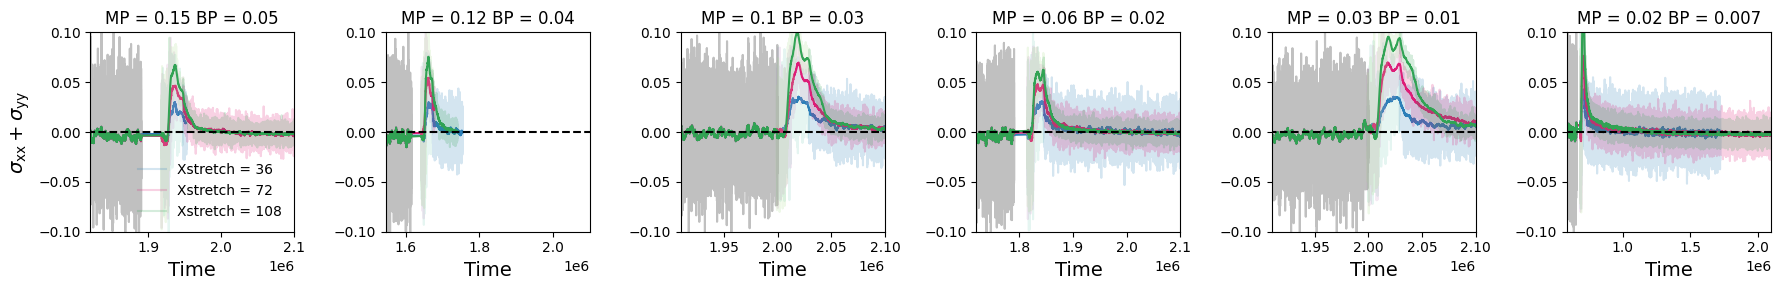

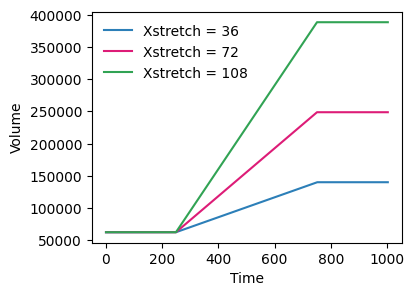

In [229]:

### Fetching stress and bond force ####

xstretches = "36 72 108".split() #36 72 108
BPs = "0.05 0.04 0.03 0.02 0.01 0.007".split() # 0.030.01 0.03 
MPs = "0.15 0.12 0.1 0.06 0.03 0.02".split() # 0.10.03 0.1 
fig,ax=plt.subplots(1,len(MPs),figsize = (3*len(MPs),3))
j=0


fig2,ax2 = plt.subplots(figsize = (4,3))
#foldernameBONDS = datadir+'runBONDprinting_tmix1e4_tbonds5e5_tstretch1e4_trelax5e5_N_fix50_XStretch108_Nev200_ChemBond6.0_prob0.05_seed'+seeds[s]+'/dumplin_bonds/'
for k in range(len(BPs)):
    datadir = datadir0+ 'MP'+MPs[k]+'_BP'+BPs[k]+'/'
    for j in range(len(xstretches)):
        print(xstretches[j]+' '+'MP'+MPs[k]+'_BP'+BPs[k])
        Vol1 = 72*72*12
        Vol2 = (72+int(xstretches[j]))*(72+int(xstretches[j]))*12-Vol1
        VolTime = []
        timeadd = 0
        fnameEquib = datadir+'Equilibrate/run_tbonds1e6_tsample1e3_N_evSamp20_N_totSamp100_XStretch108_MP'+MPs[k]+'_BP'+BPs[k]+'_MD1.5_BD2.4_seed1/'
        fnameStretch = datadir+'Stretch/run_tstretch1e4_xystretch'+xstretches[j]+'_seed1/'
        fnameRelax = datadir+'Relax/runAddMons_tbonds1e6_tsample1e3_Xstretch_'+xstretches[j]+'_N_evSamp20_N_totSamp100_MP'+MPs[k]+'_BP'+BPs[k]+'_MD1.5_BD2.4_seed1/'
        foldernames = [fnameEquib,fnameStretch,fnameRelax]
        timeTot = []
        stressTot=[]
        for i in range(len(foldernames)):
            clrs = clrrrs[j]
            #print(clrs)
            foldername = foldernames[i]
            #if k==4 and j==2 and i==2:
            #     filename = '/thermo-Copy1.dat'
            #else:
            #    filename = '/thermo.dat'
            thermo = pandas.read_csv(foldername+filename, sep = ' ', header = 'infer')
            
            #thermo2 = thermo = pandas.read_csv(foldername+'/thermo2.dat', sep = ' ', header = 'infer')
            #step etot ke pe temp press CreateNC1 CumuCreateNC1 Create7s CumuCreate7s BreakNC1 CumuBreakNC1 Break7s CumuBreak7s
            etot_, ke_, peBond_,peAngle_, temp_, press_,stressX_,stressY_,stressZ_,AvBondForce_   = thermo.etot,thermo.ke,thermo.peBond,thermo.peAngle,thermo.temp,thermo.press,thermo.stressX,thermo.stressY,thermo.stressZ,thermo.AvBondForce     
            etot, ke, peBond,peAngle, temp, press,stressX,stressY,stressZ,AvBondForce =etot_.values, ke_.values, peBond_.values,peAngle_.values, temp_.values, press_.values,stressX_.values,stressY_.values,stressZ_.values,AvBondForce_.values
            Time_ = thermo.step
            Time = Time_.values
            if i==0:
                end = 1500
            elif i==1:
                end = int(len(Time)/4)
            else:
                end=1
        
        
            if i==0:
                stressX = np.divide(stressX,Vol1)
                stressY = np.divide(stressY,Vol1)
            if i==1:
                print(Time[-1]-Time[0])
                TimeSection = (Time[-1]-Time[0])/4
                for tt in range(len(Time)):
                    if Time[tt] < Time[0]+TimeSection:
                        VolTime.append(Vol1)
                        stressX[tt] = stressX[tt]/Vol1
                        stressY[tt] = stressY[tt]/Vol1
                        tend = tt
                    elif Time[tt] < Time[0]+TimeSection*3:
                        VolAlt = (Vol1)+Vol2*(tt-tend)*2./len(Time)  #*(Time[tt]-TimeSection)/(TimeSection*2)
                        #print((tt-tend)/len(Time))
                        #print(Vol2*(Time[tt]-TimeSection)/(TimeSection*2))
                        VolTime.append(VolAlt)
                        stressX[tt] = stressX[tt]/VolAlt
                        stressY[tt] = stressY[tt]/VolAlt
                    else:
                        stressX[tt] = stressX[tt]/(Vol2+Vol1)
                        stressY[tt] = stressY[tt]/(Vol2+Vol1)
                        VolTime.append(Vol2+Vol1)
                    
            if i==2:
                stressX = np.divide(stressX,Vol2+Vol1)
                stressY = np.divide(stressY,Vol2+Vol1)
                
            if i==2:
                ax[k].plot(Time[2:-end]+timeadd,np.add(stressX[2:-end],stressY[2:-end]),alpha = 0.2,color= clrs[i],label = 'Xstretch = '+xstretches[j])
            else:
                ax[k].plot(Time[2:-end]+timeadd,np.add(stressX[2:-end],stressY[2:-end]),alpha = 0.2,color= clrs[i])

        
            for t in range(len(Time[2:-end])):
                t+=2
                timeTot.append(Time[t]+timeadd)
                stressTot.append(stressX[t]+stressY[t])
            print(i,j,k,np.max(stressTot))
            if i ==1:
                timeadd = Time[-int(len(Time)/4)]
            if i==0:
                timelimL = Time[-1] -100000
                print(Time[-1])
            if i==2:
                timelimU = Time[-1]+100000+timeadd
            timelimU = 2100000
       # ax[k].set_xlim([1900000,2500000])
        ax[k].set_ylim([-0.1,0.1])
        ax[k].set_title('MP = '+MPs[k]+' BP = '+BPs[k])
        if k==0:
            ax2.plot(VolTime,color= clrs[i],label = 'Xstretch = '+xstretches[j])
        #ax[1].plot(timeTot,stressTot,alpha = 0.5,color = clrs[1])
        N=100
        rollingAv = np.convolve(stressTot, np.ones(N)/N, mode='valid')
        ax[k].plot(timeTot[int(N/2):-int(N/2-1)],rollingAv,alpha = 1,linestyle = '-',color = clrs[2])
        #ax[k].set_ylim([-0.15,0.15])
        ax[k].set_xlim([timelimL,timelimU])
    ax[k].set_xlabel('Time',fontsize = 14)
    ax[k].plot([0,2200000],[0,0],linestyle = '--',color = 'black')
ax[0].set_ylabel(r'$\sigma_{\mathrm{xx}}+\sigma_{\mathrm{yy}}$',fontsize = 14)
ax[0].legend(frameon=False)

fig.tight_layout()

ax2.set_ylabel('Volume')
ax2.set_xlabel('Time')
ax2.legend(frameon=False)


In [ ]:
def dfs(graph, start, visited):
    visited.add(start)
    count = 1  # Count the starting node
    for neighbor in graph[start]:
        if neighbor not in visited:
            count += dfs(graph, neighbor, visited)  # Add count from neighbors
    return count

def build_graph(edges):
    graph = {}
    for edge in edges:
        a, b = edge
        if a not in graph:
            graph[a] = []
        if b not in graph:
            graph[b] = []
        graph[a].append(b)
        graph[b].append(a)  # Omit this line for a directed graph
    return graph

def build_graphWithTypes(edges,T):
    graph = {}
    i==0
    for edge in edges:
        a, b, t = edge
        if a not in graph:
            graph[a] = []
        if b not in graph:
            graph[b] = []
        if t==T:
            graph[a].append(b)
            graph[b].append(a)  # Omit this line for a directed graph
    return graph

def largest_connected_component(graph):
    visited = set()
    largest = 0
    for node in graph:
        if node not in visited:
            size = dfs(graph, node, visited)
            largest = max(largest, size)
    return largest

def is_connected(graph, nodes):
    visited = set()
    dfs(graph, next(iter(graph)), visited)
    return len(visited) == len(nodes)

def find_connected_components(graph, nodes):
    visited = set()
    num_components = 0
    for node in nodes:
        if node not in visited:
            dfs(graph, node, visited)
            num_components += 1
    return num_components
    
def calculate_average_degree(graph):
    total_degrees = sum(len(neighbors) for neighbors in graph.values())
    num_nodes = len(graph)
    #print(num_nodes)
    average_degree = total_degrees / num_nodes if num_nodes else 0
    return average_degree

def calculate_average_degree7sNc1(graph):
    total_degrees = sum(len(neighbors) for neighbors in graph.values())
    num_nodes = len(graph)
    #print(num_nodes)
    average_degree = total_degrees / num_nodes if num_nodes else 0
    return average_degree

In [240]:
def collapse_network(edges):
    # Step 1: Identify and merge nodes connected by type '1' edges
    to_merge = [edge[:2] for edge in edges if edge[2] == 1]  # Pairs to merge
    #print(len(to_merge))
    merged_nodes = {}  # Maps original nodes to their new merged node
    new_node_id = 0
    for a, b in to_merge:
        # Find or set the merged node ID for both nodes
        merged_a = merged_nodes.get(a, new_node_id)
        merged_b = merged_nodes.get(b, None)
        if merged_b is None:
            merged_nodes[a] = merged_a
            merged_nodes[b] = merged_a
            new_node_id += 1
        elif merged_a != merged_b:
            # Update all nodes that were merged into b to now be merged into a
            for node, merged_id in merged_nodes.items():
                if merged_id == merged_b:
                    merged_nodes[node] = merged_a
    #print(len(merged_nodes))
    new_nodes_set = set(merged_nodes.values())  # Merged nodes
    for node in edges:
        if node[0] not in merged_nodes:
            new_nodes_set.add(node[0])  # Add unmerged nodes
        if node[1] not in merged_nodes:
            new_nodes_set.add(node[1])
    # Step 2: Reconstruct the graph with merged nodes and updated edges
    new_edges = set()
    
    for a, b, t in edges:
        #if t == 2:  # Only consider type '2' edges for reconnection
        new_a = merged_nodes.get(a, a)  # Get merged node or original
        new_b = merged_nodes.get(b, b)
        if new_a != new_b:  # Avoid self-loops
            new_edges.add((new_a, new_b))    #, t))

    return list(new_edges)   #, list(new_nodes_set)

In [ ]:
def calculate_average_degree(graph):
    total_degrees = sum(len(neighbors) for neighbors in graph.values())
    num_nodes = len(graphT)
    #print(num_nodes)
    average_degree = total_degrees / num_nodes if num_nodes else 0
    return average_degree




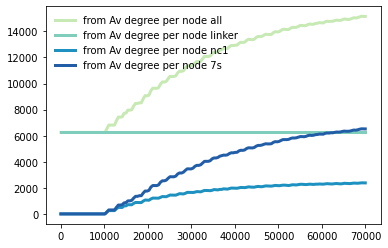

In [254]:
fig,ax = plt.subplots()

ax.plot(timeNR,np.multiply(AvDegreeNR,6250),color = clrs3[0],linewidth = 3,label = "from Av degree per node all")
ax.plot(timeNR,np.multiply(AvDegreeNR1,6250),color = clrs3[1],linewidth = 3,label = "from Av degree per node linker")
ax.plot(timeNR,np.multiply(AvDegreeNR2,6250),color = clrs3[2],linewidth = 3,label = "from Av degree per node nc1")
ax.plot(timeNR,np.multiply(AvDegreeNR3,6250),color = clrs3[3],linewidth = 3,label = "from Av degree per node 7s")
ax.legend(frameon=False)
